<a href="https://colab.research.google.com/github/dragon222001/BitCoin-Price-Predictor/blob/master/Bitcoin_Predictor_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualising the Data**



Importing the required Libraries

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Accessing the Dataset

In [2]:
dataset = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/aarambh-aider.appspot.com/o/images%2Fbitcoin.csv?alt=media')

Checking for null values

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627190 entries, 0 to 627189
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_id       627190 non-null  object 
 1   datetime_id   627190 non-null  object 
 2   market        627190 non-null  object 
 3   rpt_key       627190 non-null  object 
 4   last          627190 non-null  float64
 5   diff_24h      627190 non-null  float64
 6   diff_per_24h  627190 non-null  float64
 7   bid           627190 non-null  float64
 8   ask           627190 non-null  float64
 9   low           627190 non-null  float64
 10  high          627190 non-null  float64
 11  volume        627190 non-null  float64
 12  created_at    627190 non-null  object 
 13  updated_at    627190 non-null  object 
dtypes: float64(8), object(6)
memory usage: 67.0+ MB
None


For the first Graph, making a seperate dataset to enhance the clearity.

In [4]:
data_sorted = pd.DataFrame({'Dates':dataset['date_id'].unique(),'Average':dataset[dataset['rpt_key'].isin(['btc_usd'])]['high'].groupby(dataset['date_id']).mean()})

In [5]:
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 2017-05-31 to 2017-07-14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dates    34 non-null     object 
 1   Average  34 non-null     float64
dtypes: float64(1), object(1)
memory usage: 816.0+ bytes


(1) Bitcoin High Prices variation along date and time

I calculated the position of the months and alloted them there.

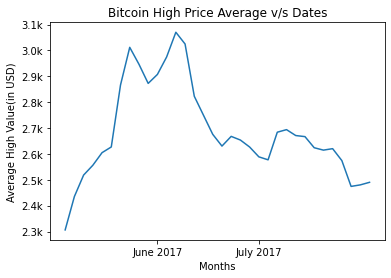

In [6]:
tic_x = [10,21]
tic_y = [2300,2400,2500,2600,2700,2800,2900,3000,3100]
label_x=['June 2017','July 2017']
label_y=['2.3k','2.4k','2.5k','2.6k','2.7k','2.8k','2.9k','3.0k','3.1k']
plt.plot(data_sorted['Dates'],data_sorted['Average'])
plt.xticks(ticks=tic_x, labels=label_x)
plt.yticks(ticks=tic_y,labels=label_y)
plt.xlabel('Months')
plt.ylabel('Average High Value(in USD)')
plt.title('Bitcoin High Price Average v/s Dates')
plt.show()

(2) Top 5 Volatile days

In [40]:
data = dataset[dataset['market'] == "bitstamp"]
data = data[data["rpt_key"] == "btc_usd"]
data = data[["date_id", "last"]]
data.head(10)

,date_id,last
3,2017-05-31,2237.40
15,2017-06-01,2248.39
23,2017-06-01,2248.35
33,2017-06-01,2250.00
43,2017-06-01,2253.78
53,2017-06-01,2257.39
63,2017-06-01,2255.70
73,2017-06-01,2258.00
83,2017-06-01,2255.33
93,2017-06-01,2257.74


In [41]:
data1 = pd.DataFrame({'date': data['date_id'].unique(), 'high': data['last'].groupby(data['date_id']).max(), 'low': data['last'].groupby(data['date_id']).min()})
data1.head(5)

,date,high,low
date_id,,,
2017-05-31,2017-05-31,2237.40,2237.40
2017-06-01,2017-06-01,2455.39,2248.35
2017-06-02,2017-06-02,2449.54,2321.08
2017-06-03,2017-06-03,2541.50,2401.55
2017-06-04,2017-06-04,2583.31,2480.07


In [42]:
data1['change']=100*(data1['high']-data1['low'])/data1['low']

In [43]:
data1.head()

,date,high,low,change
date_id,,,,
2017-05-31,2017-05-31,2237.40,2237.40,0.000000
2017-06-01,2017-06-01,2455.39,2248.35,9.208531
2017-06-02,2017-06-02,2449.54,2321.08,5.534493
2017-06-03,2017-06-03,2541.50,2401.55,5.827486
2017-06-04,2017-06-04,2583.31,2480.07,4.162786


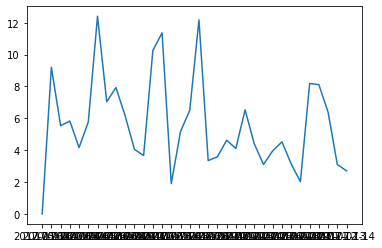

In [44]:
plt.plot(data1["date"], data1["change"])
plt.show()

In [45]:
top_change=data1.nlargest(5, ['change'])

In [46]:
top_change

,date,high,low,change
date_id,,,,
2017-06-06,2017-06-06,2932.00,2608.40,12.406073
2017-06-28,2017-06-28,2569.99,2291.00,12.177652
2017-06-13,2017-06-13,2783.00,2498.98,11.365437
2017-06-12,2017-06-12,2980.00,2703.11,10.243386
2017-06-01,2017-06-01,2455.39,2248.35,9.208531


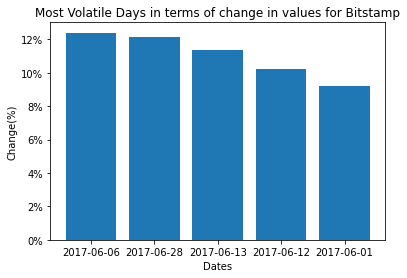

In [47]:
tic_y=[0,2,4,6,8,10,12]
label_y=['0%','2%','4%','6%','8%','10%','12%']
plt.bar(top_change['date'],top_change['change'])
plt.xlabel('Dates')
plt.ylabel('Change(%)')
plt.yticks(tic_y,label_y)
plt.title('Most Volatile Days in terms of change in values for Bitstamp')
plt.show()

(3) Similar Top 5 Volatile days for other markets

In [15]:
print(dataset['market'].unique())

['bitstamp' 'bitflyer' 'korbit' 'okcoin']


In [16]:
data = dataset[dataset['market'] == "bitflyer"]
data = data[data["rpt_key"] == "btc_jpy"]
data = data[["date_id", "last"]]
data.head(10)

,date_id,last
1,2017-05-31,267098.0
13,2017-06-01,268271.0
21,2017-06-01,268750.0
31,2017-06-01,268874.0
41,2017-06-01,268900.0
51,2017-06-01,268900.0
61,2017-06-01,268652.0
71,2017-06-01,268648.0
81,2017-06-01,268652.0
91,2017-06-01,268304.0


In [17]:
data1 = pd.DataFrame({'date': data['date_id'].unique(), 'high': data['last'].groupby(data['date_id']).max(), 'low': data['last'].groupby(data['date_id']).min()})
data1.head(5)

,date,high,low
date_id,,,
2017-05-31,2017-05-31,267098.0,267098.0
2017-06-01,2017-06-01,278990.0,261490.0
2017-06-02,2017-06-02,278601.0,266830.0
2017-06-03,2017-06-03,281280.0,272800.0
2017-06-04,2017-06-04,291500.0,279702.0


In [18]:
data1['change']=100*(data1['high']-data1['low'])/data1['low']

In [19]:
data1.head()

,date,high,low,change
date_id,,,,
2017-05-31,2017-05-31,267098.0,267098.0,0.000000
2017-06-01,2017-06-01,278990.0,261490.0,6.692417
2017-06-02,2017-06-02,278601.0,266830.0,4.411423
2017-06-03,2017-06-03,281280.0,272800.0,3.108504
2017-06-04,2017-06-04,291500.0,279702.0,4.218061


In [20]:
top_change=data1.nlargest(5, ['change'])

In [21]:
top_change

,date,high,low,change
date_id,,,,
2017-06-27,2017-06-27,288886.0,262500.0,10.051810
2017-06-06,2017-06-06,322323.0,293500.0,9.820443
2017-06-12,2017-06-12,338001.0,309862.0,9.081139
2017-06-28,2017-06-28,287551.0,266000.0,8.101880
2017-06-13,2017-06-13,318600.0,295101.0,7.963036


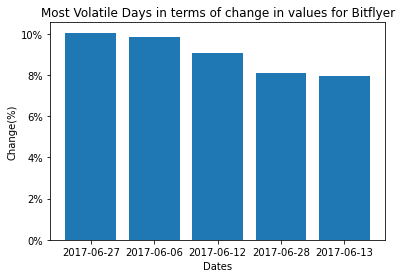

In [23]:
tic_y=[0,2,4,6,8,10]
label_y=['0%','2%','4%','6%','8%','10%']
plt.bar(top_change['date'],top_change['change'])
plt.yticks(ticks=tic_y,labels=label_y)
plt.xlabel('Dates')
plt.ylabel('Change(%)')
plt.title('Most Volatile Days in terms of change in values for Bitflyer')
plt.show()

In [24]:
data = dataset[dataset['market'] == "korbit"]
data = data[data["rpt_key"] == "btc_krw"]
data = data[["date_id", "last"]]
data.head(10)

,date_id,last
2,2017-05-31,3003500.0
14,2017-06-01,3003500.0
22,2017-06-01,3017000.0
32,2017-06-01,3019500.0
42,2017-06-01,3006000.0
52,2017-06-01,3007000.0
62,2017-06-01,3018500.0
72,2017-06-01,3020000.0
82,2017-06-01,3011500.0
92,2017-06-01,3012000.0


In [25]:
data1 = pd.DataFrame({'date': data['date_id'].unique(), 'high': data['last'].groupby(data['date_id']).max(), 'low': data['last'].groupby(data['date_id']).min()})
data1.head(5)

,date,high,low
date_id,,,
2017-05-31,2017-05-31,3003500.0,3003500.0
2017-06-01,2017-06-01,3210000.0,3003500.0
2017-06-02,2017-06-02,3153500.0,3055500.0
2017-06-03,2017-06-03,3200000.0,3007000.0
2017-06-04,2017-06-04,3153000.0,3060000.0


In [26]:
data1['change']=100*(data1['high']-data1['low'])/data1['low']

In [27]:
data1.head(5)

,date,high,low,change
date_id,,,,
2017-05-31,2017-05-31,3003500.0,3003500.0,0.000000
2017-06-01,2017-06-01,3210000.0,3003500.0,6.875312
2017-06-02,2017-06-02,3153500.0,3055500.0,3.207331
2017-06-03,2017-06-03,3200000.0,3007000.0,6.418357
2017-06-04,2017-06-04,3153000.0,3060000.0,3.039216


In [28]:
top_change=data1.nlargest(5, ['change'])

In [29]:
top_change

,date,high,low,change
date_id,,,,
2017-07-11,2017-07-11,3005500.0,2657000.0,13.116297
2017-06-06,2017-06-06,3470000.0,3095000.0,12.116317
2017-06-27,2017-06-27,3191000.0,2900000.0,10.034483
2017-06-28,2017-06-28,3199500.0,2941000.0,8.789527
2017-07-14,2017-07-14,2850000.0,2641000.0,7.913669


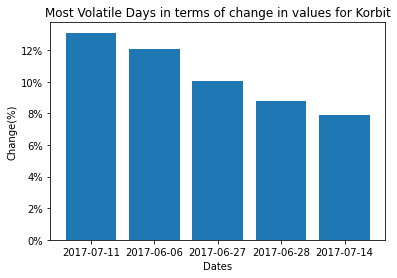

In [31]:
tic_y=[0,2,4,6,8,10,12]
label_y=['0%','2%','4%','6%','8%','10%','12%']
plt.bar(top_change['date'],top_change['change'])
plt.yticks(ticks=tic_y,labels=label_y)
plt.xlabel('Dates')
plt.ylabel('Change(%)')
plt.title('Most Volatile Days in terms of change in values for Korbit')
plt.show()

In [48]:
data = dataset[dataset['market'] == "okcoin"]
data = data[data["rpt_key"] == "btc_usd"]
data = data[["date_id", "last"]]
data.head(10)

,date_id,last
4,2017-05-31,2318.82
16,2017-06-01,2320.42
24,2017-06-01,2323.50
34,2017-06-01,2364.40
44,2017-06-01,2369.56
54,2017-06-01,2374.77
64,2017-06-01,2370.39
74,2017-06-01,2354.98
84,2017-06-01,2350.00
94,2017-06-01,2350.32


In [49]:
data1 = pd.DataFrame({'date': data['date_id'].unique(), 'high': data['last'].groupby(data['date_id']).max(), 'low': data['last'].groupby(data['date_id']).min()})
data1.head(5)

,date,high,low
date_id,,,
2017-05-31,2017-05-31,2318.82,2318.82
2017-06-01,2017-06-01,2561.67,2320.42
2017-06-02,2017-06-02,2597.00,2465.03
2017-06-03,2017-06-03,2632.76,2425.38
2017-06-04,2017-06-04,2630.00,2540.96


In [50]:
data1['change']=100*(data1['high']-data1['low'])/data1['low']

In [51]:
data1.head()

,date,high,low,change
date_id,,,,
2017-05-31,2017-05-31,2318.82,2318.82,0.000000
2017-06-01,2017-06-01,2561.67,2320.42,10.396825
2017-06-02,2017-06-02,2597.00,2465.03,5.353687
2017-06-03,2017-06-03,2632.76,2425.38,8.550413
2017-06-04,2017-06-04,2630.00,2540.96,3.504187


In [52]:
top_change=data1.nlargest(5, ['change'])

In [53]:
top_change

,date,high,low,change
date_id,,,,
2017-06-12,2017-06-12,3182.59,2775.33,14.674291
2017-06-06,2017-06-06,3094.17,2713.44,14.031267
2017-06-08,2017-06-08,2909.92,2629.99,10.643767
2017-06-01,2017-06-01,2561.67,2320.42,10.396825
2017-06-27,2017-06-27,2699.99,2445.82,10.392016


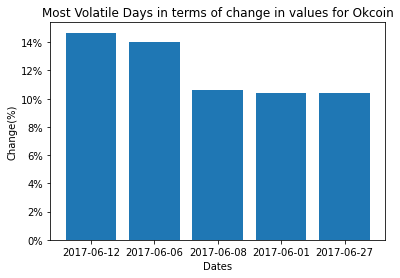

In [54]:
tic_y=[0,2,4,6,8,10,12,14]
label_y=['0%','2%','4%','6%','8%','10%','12%','14%']
plt.bar(top_change['date'],top_change['change'])
plt.yticks(ticks=tic_y,labels=label_y)
plt.xlabel('Dates')
plt.ylabel('Change(%)')
plt.title('Most Volatile Days in terms of change in values for Okcoin')
plt.show()

List of markets

In [ ]:
dataset[dataset['market']=='bitflyer'].count()

date_id         188157
datetime_id     188157
market          188157
rpt_key         188157
last            188157
diff_24h        188157
diff_per_24h    188157
bid             188157
ask             188157
low             188157
high            188157
volume          188157
created_at      188157
updated_at      188157
dtype: int64

In [ ]:
dataset[dataset['market']=='bitstamp'].count()

date_id         125438
datetime_id     125438
market          125438
rpt_key         125438
last            125438
diff_24h        125438
diff_per_24h    125438
bid             125438
ask             125438
low             125438
high            125438
volume          125438
created_at      125438
updated_at      125438
dtype: int64

In [ ]:
dataset[dataset['market']=='korbit'].count()

date_id         188157
datetime_id     188157
market          188157
rpt_key         188157
last            188157
diff_24h        188157
diff_per_24h    188157
bid             188157
ask             188157
low             188157
high            188157
volume          188157
created_at      188157
updated_at      188157
dtype: int64

In [ ]:
dataset[dataset['market']=='okcoin'].count()

date_id         125438
datetime_id     125438
market          125438
rpt_key         125438
last            125438
diff_24h        125438
diff_per_24h    125438
bid             125438
ask             125438
low             125438
high            125438
volume          125438
created_at      125438
updated_at      125438
dtype: int64

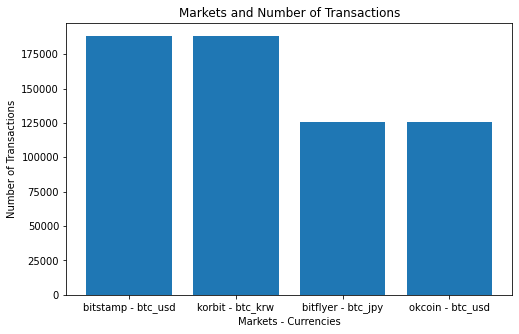

In [ ]:
fig = plt.figure(figsize=(8,5))
labels=['bitstamp - btc_usd','korbit - btc_krw','bitflyer - btc_jpy','okcoin - btc_usd']
counts=[188157,188157,125438,125438]
plt.bar(labels,counts)
plt.xlabel('Markets - Currencies')
plt.ylabel('Number of Transactions')
plt.title('Markets and Number of Transactions')
plt.show()